# Handwritten Digits Recognition using Neural Network

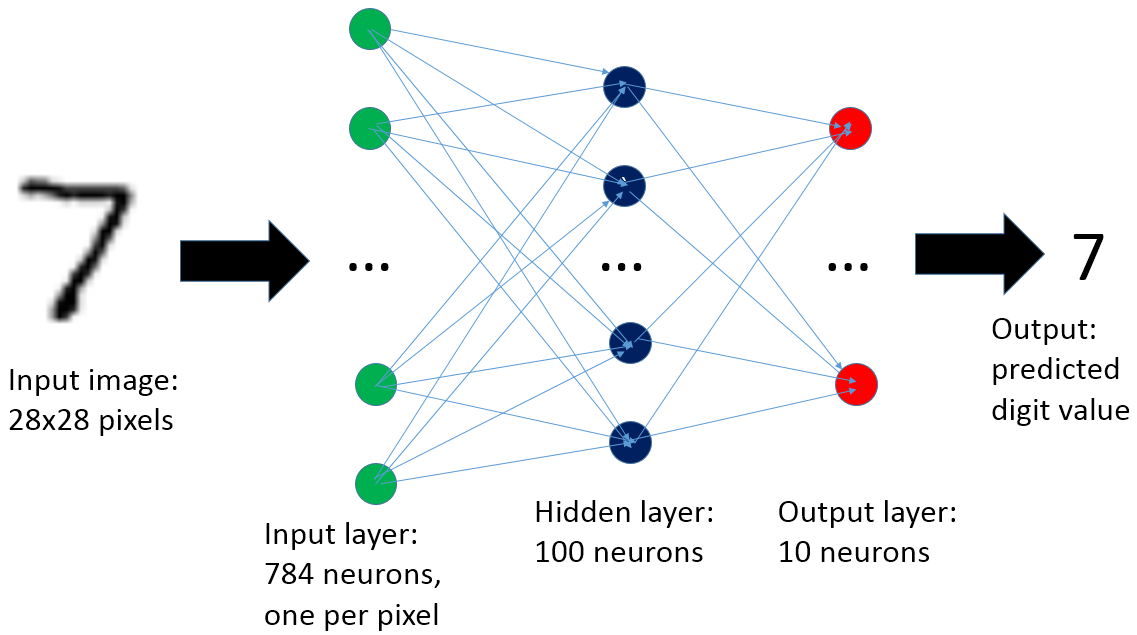

In [1]:
# Importing libraries
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Decide if to load an existing model or to train a new one
train_new_model = True

In [3]:
# Loading the MNIST data set with samples and splitting it
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
# Normalizing the data (making length = 1)
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [7]:
# Create a neural network model
model = tf.keras.models.Sequential()

# Add one flattened input layer for the pixels
model.add(tf.keras.layers.Flatten())

# Add two dense hidden layers
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

# Add one dense output layer for the 10 digits
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [8]:
# Compiling and optimizing model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Training the model
model.fit(X_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8638 - loss: 0.4721
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 981us/step - accuracy: 0.9640 - loss: 0.1129
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.9760 - loss: 0.0756


In [19]:
# Saving the model
model.save('handwritten_digits.keras')

In [26]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9675 - loss: 0.0983


In [27]:
print("Loss :",loss)
print("Accuracy :",accuracy)

Loss : 0.08619684725999832
Accuracy : 0.9731000065803528


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The number is probably a 7


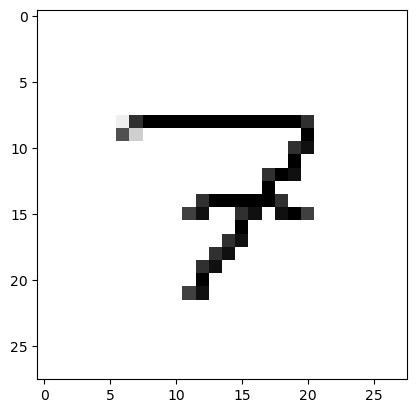

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 2


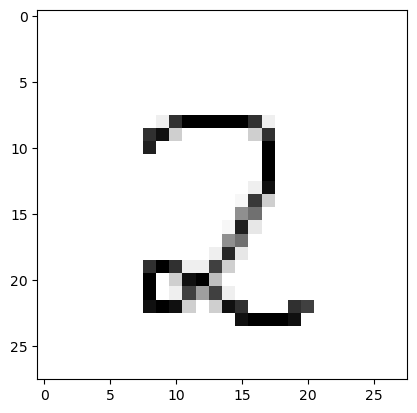

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The number is probably a 9


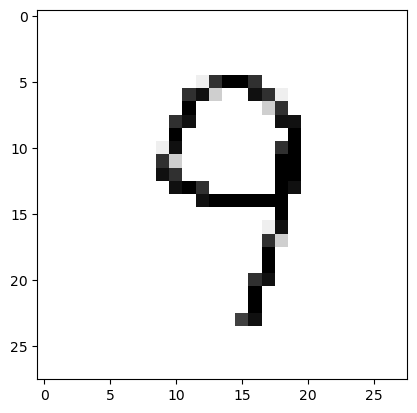

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 8


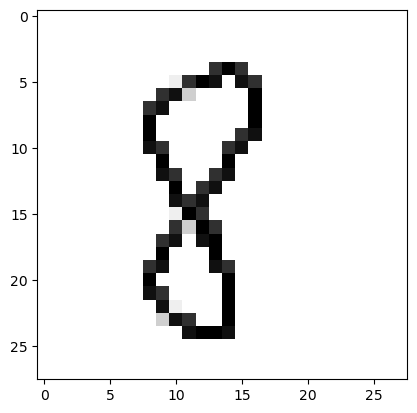

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 5


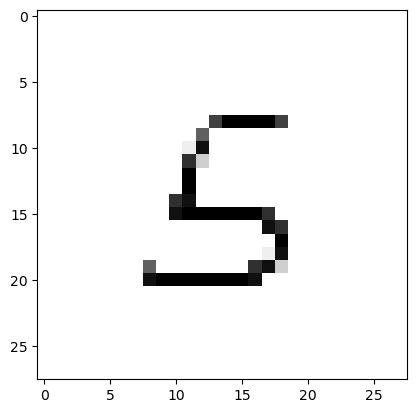

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 6


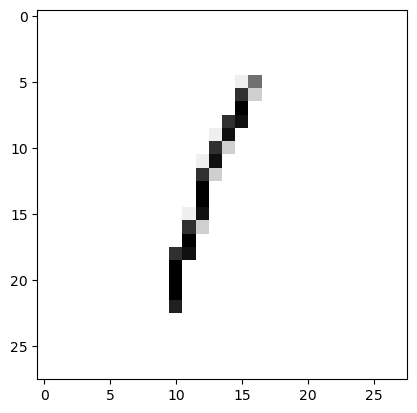

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 1


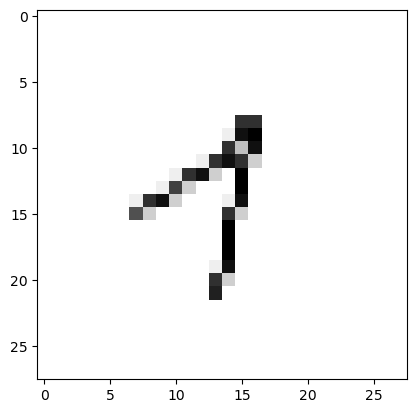

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 1


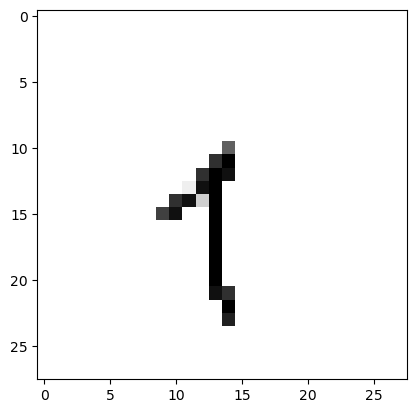

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 7


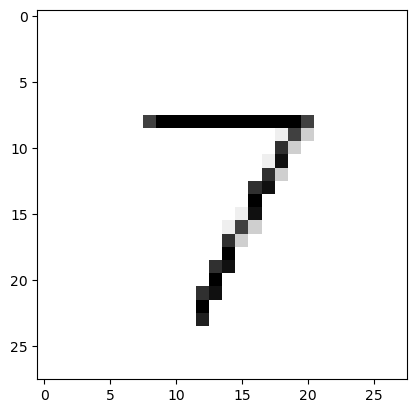

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The number is probably a 7


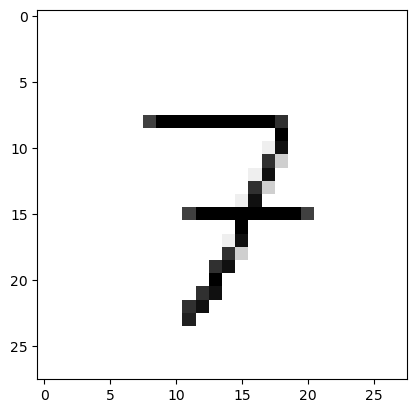

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 0


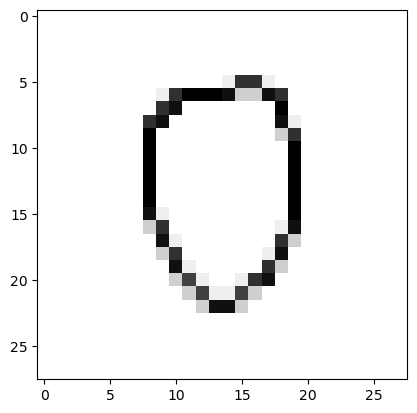

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The number is probably a 1


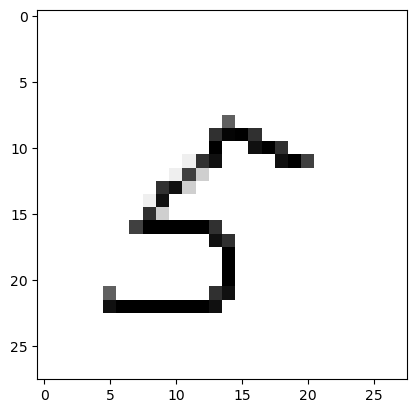

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 3


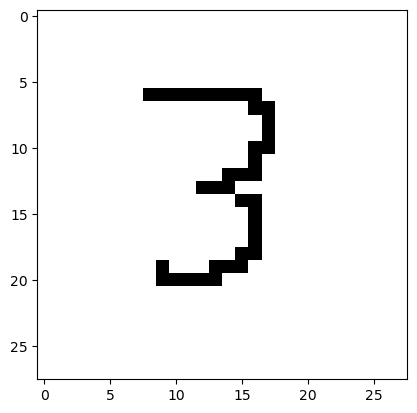

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 2


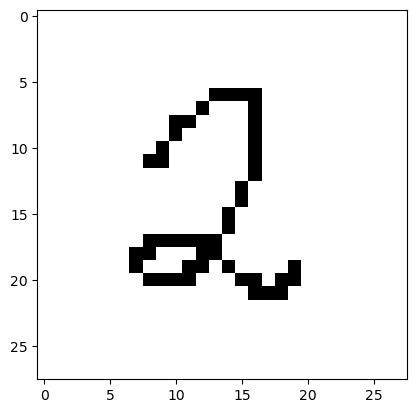

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The number is probably a 1


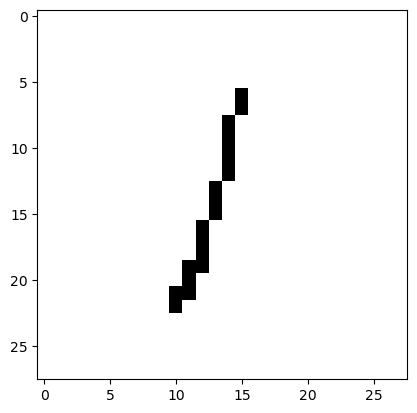

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 7


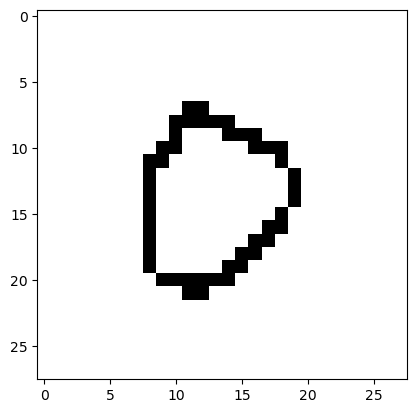

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The number is probably a 1


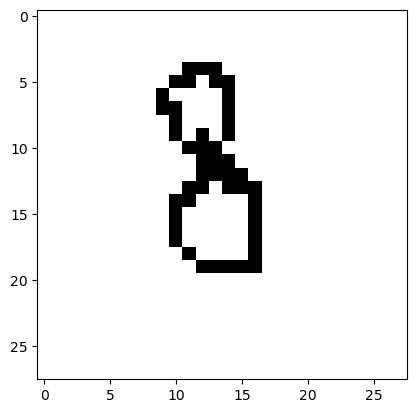

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The number is probably a 7


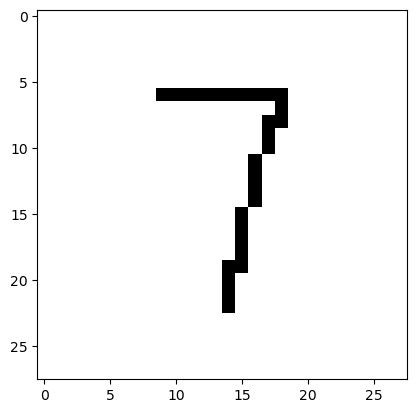

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The number is probably a 1


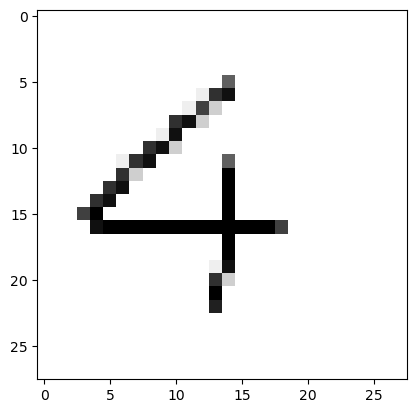

In [28]:
# Load custom images and predict them
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
        image_number += 1
    except:
        print("Error reading image! Proceeding with next image...")
        image_number += 1